<a href="https://colab.research.google.com/github/MaDufie/ml_journey/blob/feature%2Fprediction-may-2024/weather_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats

In [ ]:
weather_df = pd.read_csv('/content/drive/MyDrive/My ML Journey/flight_arrival_delay_prediction/data/may_2024_data/airport_weather_2405.csv')

# Exploring the Weather Data

## Weather Data Info

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261888 entries, 0 to 261887
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AIRPORT               261888 non-null  object 
 1   YEAR                  261888 non-null  int64  
 2   MONTH                 261888 non-null  int64  
 3   DAY_OF_MONTH          261888 non-null  int64  
 4   TIME                  261888 non-null  int64  
 5   weather_code          261888 non-null  int64  
 6   temperature_2m        261888 non-null  float64
 7   relative_humidity_2m  261888 non-null  int64  
 8   dewpoint_2m           261888 non-null  float64
 9   surface_pressure      261888 non-null  float64
 10  precipitation         261888 non-null  float64
 11  rain                  261888 non-null  float64
 12  snowfall              261888 non-null  float64
 13  cloudcover            261888 non-null  int64  
 14  cloudcover_low        261888 non-null  int64  
 15  

In [ ]:
weather_df.head()

,AIRPORT,YEAR,MONTH,DAY_OF_MONTH,TIME,weather_code,temperature_2m,relative_humidity_2m,dewpoint_2m,surface_pressure,...,snowfall,cloudcover,cloudcover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,ABE,2024,5,1,0,2,17.1,91,15.7,997.9,...,0.0,57,3,40,100,9.2,15.5,315,329,16.2
1,ABE,2024,5,1,100,3,16.4,92,15.1,997.9,...,0.0,91,1,100,100,7.2,13.8,307,319,16.2
2,ABE,2024,5,1,200,1,15.7,92,14.4,997.5,...,0.0,25,0,2,80,8.8,17.8,305,312,15.8
3,ABE,2024,5,1,300,1,14.7,93,13.5,997.4,...,0.0,30,0,0,100,9.9,21.1,314,317,17.3
4,ABE,2024,5,1,400,1,14.5,90,13.0,998.0,...,0.0,30,0,0,100,10.5,22.8,319,325,18.7


## Descriptive Analysis

In [ ]:
weather_df.describe()

,YEAR,MONTH,DAY_OF_MONTH,TIME,weather_code,temperature_2m,relative_humidity_2m,dewpoint_2m,surface_pressure,precipitation,...,snowfall,cloudcover,cloudcover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,261888.0,261888.0,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,...,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000,261888.000000
mean,2024.0,5.0,16.000000,1150.000000,9.537856,17.821654,68.093792,10.627712,971.475876,0.137411,...,0.002004,37.937775,20.113304,22.036932,36.439318,12.077124,19.188830,186.821912,188.151378,25.089671
std,0.0,0.0,8.944289,692.219977,19.793976,7.769752,22.703566,8.440369,56.081977,0.751771,...,0.039601,36.554399,34.249564,34.157058,43.269231,6.778487,9.975764,94.633721,94.542306,12.193605
min,2024.0,5.0,1.000000,0.000000,0.000000,-16.000000,2.000000,-25.900000,751.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.700000
25%,2024.0,5.0,8.000000,575.000000,0.000000,12.400000,53.000000,5.000000,967.100000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,7.100000,11.800000,115.000000,117.000000,15.800000
50%,2024.0,5.0,16.000000,1150.000000,1.000000,18.300000,72.000000,11.000000,990.300000,0.000000,...,0.000000,29.000000,0.000000,2.000000,6.000000,10.800000,18.500000,185.000000,188.000000,23.400000
75%,2024.0,5.0,24.000000,1725.000000,3.000000,23.600000,87.000000,17.500000,1008.400000,0.000000,...,0.000000,71.000000,21.000000,29.000000,94.000000,15.800000,25.300000,263.000000,264.000000,32.400000
max,2024.0,5.0,31.000000,2300.000000,75.000000,41.900000,100.000000,27.300000,1034.900000,37.400000,...,3.850000,100.000000,100.000000,100.000000,100.000000,65.200000,95.100000,360.000000,360.000000,108.700000


In [ ]:
weather_df.nunique()

,0
AIRPORT,352
YEAR,1
MONTH,1
DAY_OF_MONTH,31
TIME,24
weather_code,13
temperature_2m,576
relative_humidity_2m,99
dewpoint_2m,490
surface_pressure,2792


## Checking for duplicate rows

In [ ]:
weather_duplicates = weather_df.duplicated()
num_weather_duplicates = weather_duplicates.sum()
weather_duplicate_rows = weather_df[weather_duplicates]

print(f"Number of duplicate Weather rows: {num_weather_duplicates}")
print("Duplicate Weather rows:")
print(weather_duplicate_rows)

Number of duplicate Weather rows: 0
Duplicate Weather rows:
Empty DataFrame
Columns: [AIRPORT, YEAR, MONTH, DAY_OF_MONTH, TIME, weather_code, temperature_2m, relative_humidity_2m, dewpoint_2m, surface_pressure, precipitation, rain, snowfall, cloudcover, cloudcover_low, cloud_cover_mid, cloud_cover_high, wind_speed_10m, wind_speed_100m, wind_direction_10m, wind_direction_100m, wind_gusts_10m]
Index: []

[0 rows x 22 columns]


## Changing Time format to "hh"

In [ ]:
def extract_hour(time_val):
    return int(time_val // 100)

weather_df['TIME'] = weather_df['TIME'].apply(extract_hour)

In [ ]:
weather_df.head()

,AIRPORT,YEAR,MONTH,DAY_OF_MONTH,TIME,weather_code,temperature_2m,relative_humidity_2m,dewpoint_2m,surface_pressure,...,snowfall,cloudcover,cloudcover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,ABE,2024,5,1,0,2,17.1,91,15.7,997.9,...,0.0,57,3,40,100,9.2,15.5,315,329,16.2
1,ABE,2024,5,1,1,3,16.4,92,15.1,997.9,...,0.0,91,1,100,100,7.2,13.8,307,319,16.2
2,ABE,2024,5,1,2,1,15.7,92,14.4,997.5,...,0.0,25,0,2,80,8.8,17.8,305,312,15.8
3,ABE,2024,5,1,3,1,14.7,93,13.5,997.4,...,0.0,30,0,0,100,9.9,21.1,314,317,17.3
4,ABE,2024,5,1,4,1,14.5,90,13.0,998.0,...,0.0,30,0,0,100,10.5,22.8,319,325,18.7


## Correlation Matrix


<Axes: >

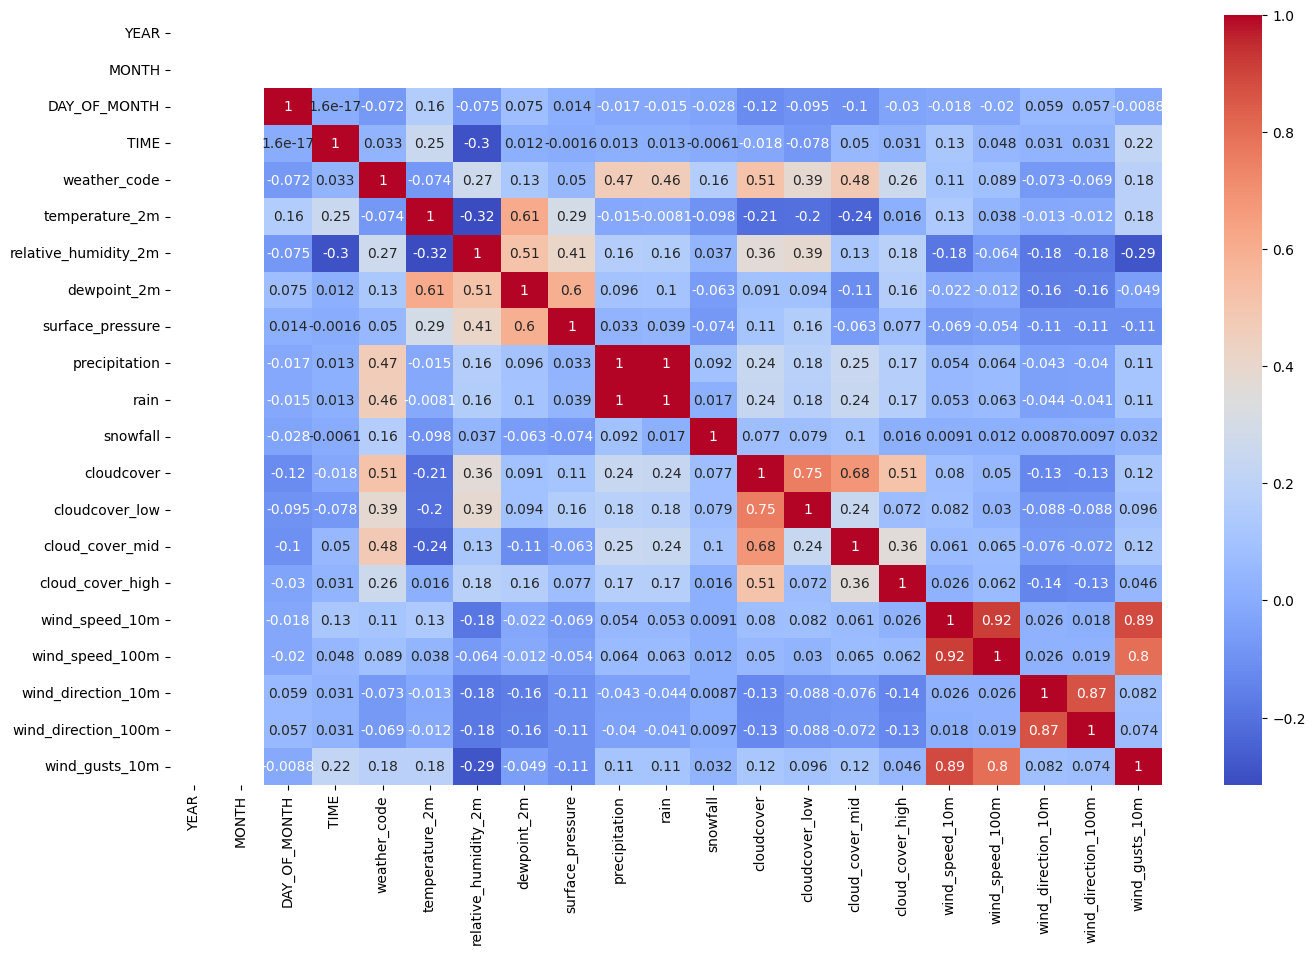

In [ ]:
plt.figure(figsize=(16,10))
numerical_df = weather_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Saving Weather Data to CSV

In [ ]:
weather_df.to_csv('weather_data.csv', index=False)